In [1]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
data = pd.read_json('data.json', lines = True)
emotions_df = pd.read_csv('emotions_df.csv')
news_predicted_topics = np.load('news_predicted_topics.npy')

In [3]:
emotions_df

,enc_emote_c1,enc_emote_c2,enc_emote_c3,emote_c1,emote_c2,emote_c3
0,0,0,0,anger,anger,anger
1,0,4,0,anger,sadness,anger
2,1,2,4,fear,joy,sadness
3,2,0,2,joy,anger,joy
4,0,0,0,anger,anger,anger
...,...,...,...,...,...,...
9897,0,2,2,anger,joy,joy
9898,0,4,2,anger,sadness,joy
9899,2,0,2,joy,anger,joy
9900,2,0,0,joy,anger,anger


In [4]:
# Concatenate all the data into one dataframe
dtf = pd.concat([data, emotions_df], axis=1)
dtf['pred_topic'] = pd.DataFrame(news_predicted_topics)

In [5]:
dtf.columns

Index(['subreddit', 'id', 'title', 'score', 'upvote_ratio', 'url', 'comment_1',
       'comment_2', 'comment_3', 'score_c1', 'score_c2', 'score_c3',
       'enc_emote_c1', 'enc_emote_c2', 'enc_emote_c3', 'emote_c1', 'emote_c2',
       'emote_c3', 'pred_topic'],
      dtype='object')

In [6]:
emot_react_df = dtf[['pred_topic','emote_c1','emote_c2','emote_c3']]
emot_react_df

,pred_topic,emote_c1,emote_c2,emote_c3
0,CRIMES,anger,anger,anger
1,HEALTH,anger,sadness,anger
2,POLITICS,fear,joy,sadness
3,CRIMES,joy,anger,joy
4,HEALTH,anger,anger,anger
...,...,...,...,...
9897,HEALTH,anger,joy,joy
9898,HEALTH,anger,sadness,joy
9899,POLITICS,joy,anger,joy
9900,CRIMES,joy,anger,anger


In [32]:
# For example, how much times 1st comment is 'angry' towards news topics:
emote_lst =['anger', 'joy', 'fear', 'love', 'surprise', 'sadness']
comment_lst = ['emote_c1', 'emote_c2', 'emote_c3']

pie_data = pd.DataFrame(np.zeros((4, 6)))
pie_data = pie_data.rename(columns={0: "anger", 1: "joy", 2: "fear", 3: "love", 4: "surprise", 5: "sadness",})
pie_data = pie_data.rename(index={0: "CRIMES", 1: "ECONOMY", 2: "HEALTH", 3: "POLITICS"})

for emotion in emote_lst:
    for comments in comment_lst:
        
        x = emot_react_df.groupby(['pred_topic'])[comments].apply(lambda x: x[x.str.contains(emotion)].count())
        y = pie_data[emotion].to_numpy()
        pie_data[emotion] = (x.to_numpy() + y).tolist()


In [38]:
pie_data

,anger,joy,fear,love,surprise,sadness
CRIMES,4321.0,2618.0,591.0,113.0,121.0,858.0
ECONOMY,2216.0,1610.0,238.0,58.0,65.0,454.0
HEALTH,5308.0,3756.0,655.0,142.0,188.0,1129.0
POLITICS,2572.0,1722.0,280.0,64.0,90.0,537.0


In [42]:
pie_data.loc['CRIMES'].tolist()

[4321.0, 2618.0, 591.0, 113.0, 121.0, 858.0]

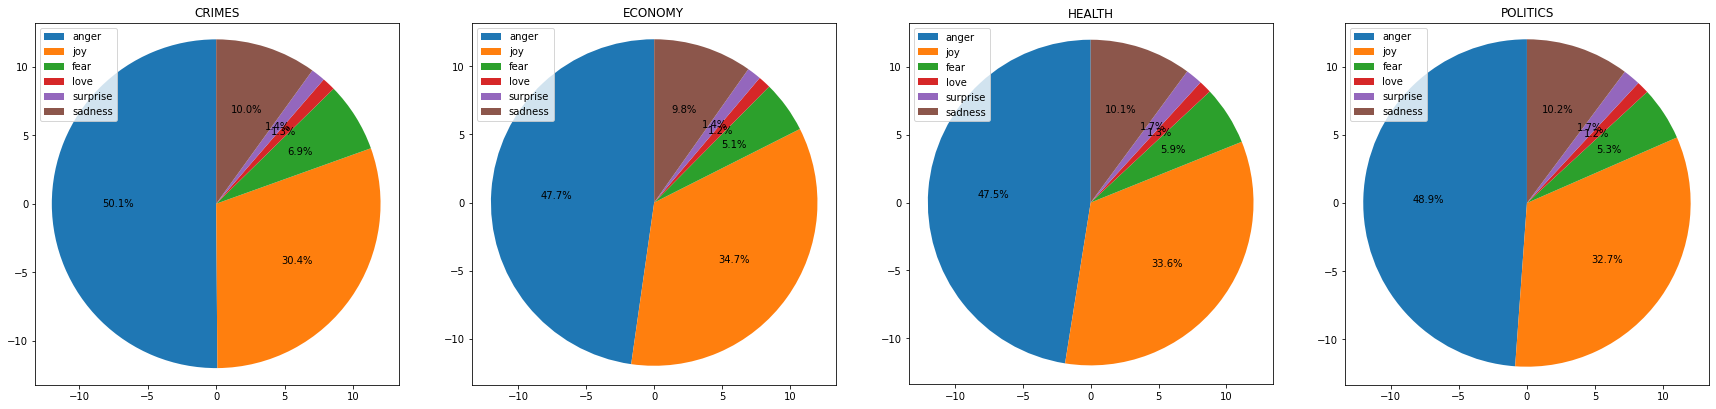

In [88]:
topic_lst = ['CRIMES', 'ECONOMY', 'HEALTH', 'POLITICS']

figure, axis = plt.subplots(1, 4, figsize=(30,10))

for i, topic in enumerate(topic_lst):
    
    data = pie_data.loc[topic].tolist()

    axis[i].pie(data, labels=emote_lst, startangle=90, radius=10^6, frame=True, labeldistance=None, autopct='%1.1f%%')
    axis[i].title.set_text(topic)
    axis[i].legend()

plt.show() 